In [147]:
import numpy as np

m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [148]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly= poly_feature.fit_transform(X)

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
lin_reg.intercept_

array([1.94293451])

In [151]:
lin_reg.coef_

array([[1.00588685, 0.5009012 ]])

In [152]:
# y= 0.50x^2+ 1.0x+2.0

In [153]:
for i in range(1,2):
    print(i)

1


In [154]:
for i in range(1):
    print(i)

0


In [155]:
a=[0,1,2,3]
a[:0], a[0:], a[:1], a[1:], a[:3], a[3:], a[:4], a[4:]

([], [0, 1, 2, 3], [0], [1, 2, 3], [0, 1, 2], [3], [0, 1, 2, 3], [])

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-", linewidth=3, label="val")

In [157]:
lin_reg= LinearRegression()

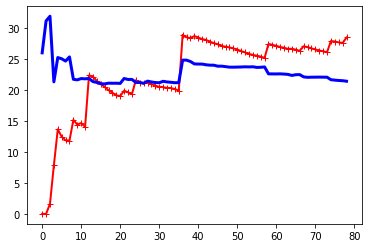

In [158]:
plot_learning_curve(lin_reg, X, y)

[0, 80, 0, 30]

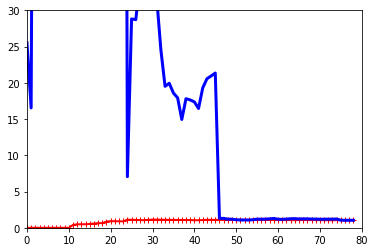

In [159]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curve (polynomial_regression, X, y)
plt.axis([0, 80, 0, 30])

In [160]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [161]:
ridge_reg.predict([[1.5]])

array([[16.0735632]])

In [162]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([13.82962432])

In [163]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([16.08113855])

In [164]:
sgd_reg=SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([15.49475116])

In [165]:
from sklearn.linear_model import ElasticNet
elsatic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elsatic_net.fit(X, y)
elsatic_net.predict([[1.5]])

array([16.08455321])

In [166]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())    
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [167]:
sgd_reg=SGDRegressor(max_iter =1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [168]:
minimum_val_error =float('inf')

In [169]:
minimum_val_error

inf

In [170]:
best_epoch=None
best_model=None

In [172]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict =sgd_reg.predict(X_val_poly_scaled)
    val_error =mean_squared_error(y_val, y_val_predict)
    if val_error <minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [173]:
best_epoch

1

In [174]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [176]:
sgd_reg.predict([[1.5]])

ValueError: shapes (1,1) and (90,) not aligned: 1 (dim 1) != 90 (dim 0)